In [1]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

## Qiskit is updated very often

You can find Qiskit updates and release status at the following [link](https://github.com/Qiskit/feedback/wiki/Release-Planning)

In addition to newly added functions and bug fixes, it is most inconvenient when the function you usually use disappears, so look carefully at te "deprecate" part.

In [2]:
import qiskit as qk

In [3]:
import numpy as np

In [4]:
%matplotlib inline

## Circuit Basics

![circuit diagram](img/sample_circuit.png)

### Building the circuit

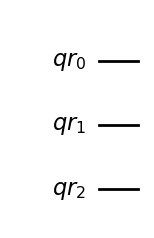

In [5]:
# Create a Quantum circuit acting on a quantum register of three qubits
q = qk.QuantumRegister(3, 'qr')
circ = qk.QuantumCircuit(q)
circ.draw('mpl')

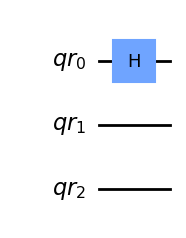

In [6]:
# Ad a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
circ.draw('mpl')

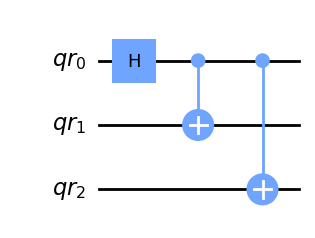

In [7]:
# Add a CX(CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX(CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

circ.draw('mpl')

In [8]:
# if you want to save the circuit diagram
image = circ.draw('mpl')
image.savefig('img/sample_circuit')

## Simulating circuits using Qiskit Aer

### Statevector backend

In [9]:
# from qiskit import Aer
# 위의 라이브러리는 더이상 버전 관리가 이루어지지 않음. 따라서 다음을 사용.
from qiskit.providers.aer import StatevectorSimulator

statevec_sim_backend = StatevectorSimulator()

In [10]:
# Create a Quantum Program for execution
job = qk.execute(circ, statevec_sim_backend)

In [11]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [12]:
result = job.result()

In [13]:
outputstate = result.get_statevector(decimals = 3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


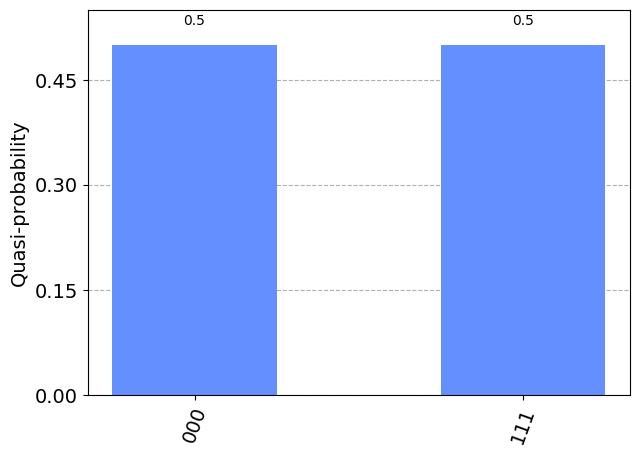

In [14]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

### Unitary backend

In [15]:
# Run the quantum circuit on a unitary simulator backend
from qiskit.providers.aer import UnitarySimulator
unitar_sim_backend = UnitarySimulator()
result = qk.execute(circ, unitar_sim_backend).result()

# Show the results
print(result.get_unitary(decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

### OpenQasm backend

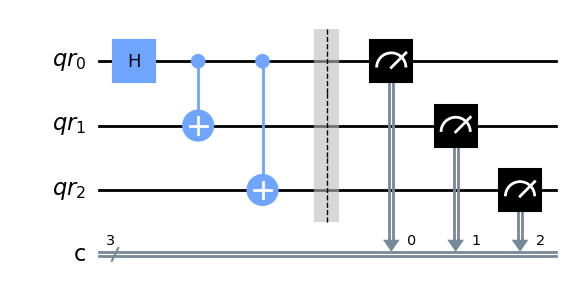

In [16]:
# Create a Quantum Circuit
meas = qk.QuantumCircuit(3, 3)
meas.barrier([0, 1, 2]) # or meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure([0, 1, 2], [0, 1, 2]) # or meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using the addition operator
# But now we cannot use the addition operator like
# "qc = circ + meas"
# We can do the same task with method "compose"
qc = circ.compose(meas)

#drawing the circuit
qc.draw('mpl')

In [17]:
# Use Aer's qawm_simulator
from qiskit.providers.aer import QasmSimulator
qasm_sim_backend = QasmSimulator()

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
result = qk.execute(qc, qasm_sim_backend, shots = 1024).result()

{'111': 507, '000': 517}


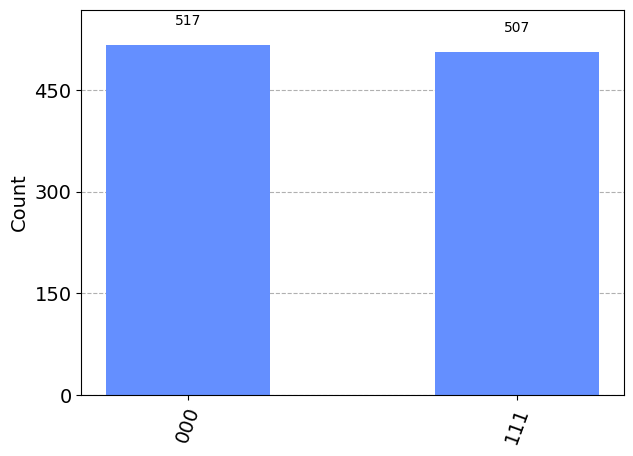

In [18]:
print(result.get_counts())
plot_histogram(result.get_counts())

## Bloch sphere representation

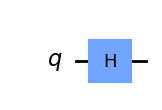

In [19]:
single_qubit = qk.QuantumCircuit(1)
single_qubit.h(0)
single_qubit.draw('mpl')

In [20]:
job = qk.execute(single_qubit, statevec_sim_backend).result()

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


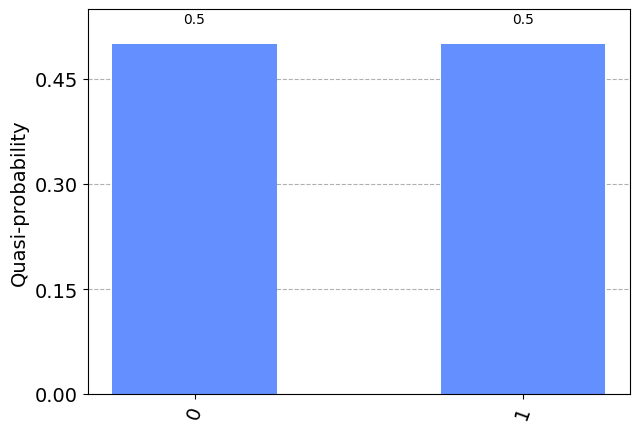

In [21]:
print(job.get_statevector())
plot_histogram(job.get_counts())

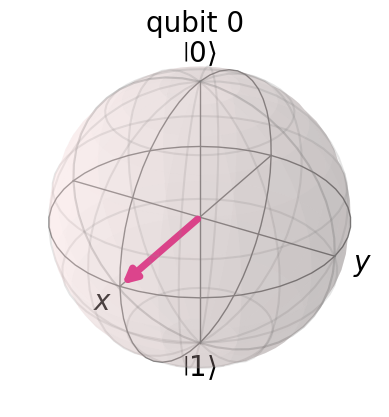

In [22]:
from qiskit.visualization import plot_bloch_multivector, visualize_transition
plot_bloch_multivector(job.get_statevector())

In [23]:
# visualize_transition(single_qubit)

## Quantum hardware backend (IBMQ server)

In [24]:
# from qiskit import IBMQ
# 위의 라이브러리는 더이상 버전 관리가 되지 않을 예정.
# Instead of it, we can use
from qiskit_ibm_provider import IBMProvider

In [25]:
provider = IBMProvider()

In [26]:
print("available backends: ")
provider.backends()

available backends: 


[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_qasm_simulator')>]

In [27]:
# from qiskit.providers.ibmq import least_busy 라이브러리 버전 관리 더이상 안 될 예정
from qiskit_ibm_provider import least_busy

In [28]:
large_enough_devices = provider.backends(filters = lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)

In [29]:
backend

<IBMBackend('ibmq_manila')>

### qasm simulator on the IBMQ Server

In [30]:
ibmq_qasm_simulator_backend = provider.get_backend('ibmq_qasm_simulator')

In [31]:
backend_status = ibmq_qasm_simulator_backend.status()
[backend_status.backend_name, backend_status.operational, backend_status.pending_jobs, backend_status.status_msg]

['ibmq_qasm_simulator', True, 0, 'active']

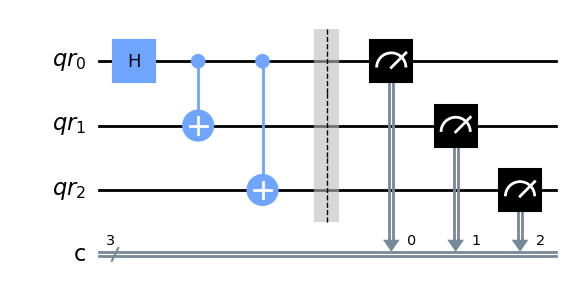

In [32]:
# Create a Qautnum Circuit
meas = qk.QuantumCircuit(3, 3)
meas.barrier([0, 1, 2]) # or meas.barrier(range(3))
# map the quantum measurement to hte classical bits
meas.measure([0, 1, 2], [0, 1, 2]) # or meas.measure(range(3), range(3))

qc = circ.compose(meas)

#drawing the circuit
qc.draw('mpl')

In [33]:
job = qk.execute(qc, ibmq_qasm_simulator_backend, shots = 4096)

In [34]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [35]:
# Grab the results from the job.
result_sim = job.result()

In [36]:
counts = result_sim.get_counts()
print(counts)

{'111': 1969, '000': 2127}


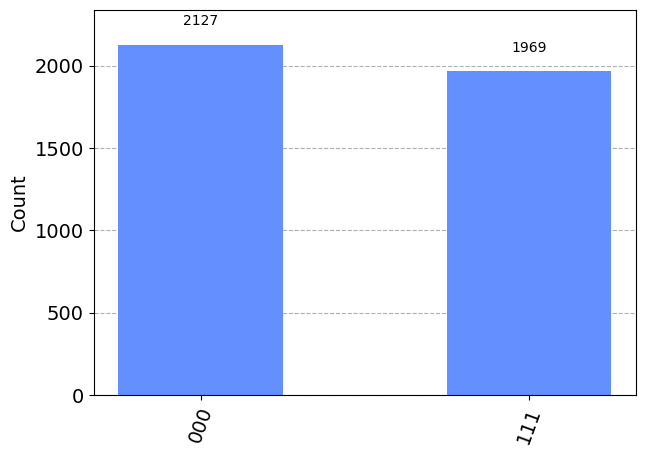

In [37]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Real Quantum Computer on the IBMQ server

In [38]:
provider.backends()

[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_qasm_simulator')>]

In [39]:
large_enough_devices = provider.backends(filters = lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)

In [40]:
backend_status = backend.status()
[backend_status.backend_name, backend_status.operational, backend_status.pending_jobs, backend_status.status_msg]

['ibmq_manila', True, 0, 'active']

In [41]:
job = qk.execute(qc, backend, shots = 4096)

In [42]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [43]:
counts = job.result().get_counts()
print(counts)

{'000': 1983, '001': 24, '010': 26, '011': 122, '100': 26, '101': 89, '110': 44, '111': 1782}


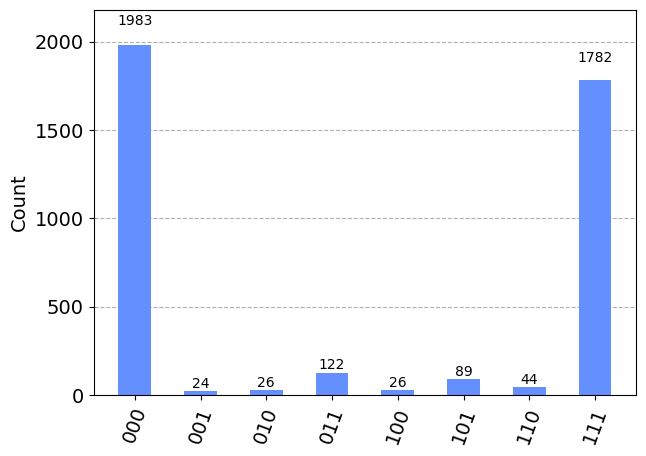

In [44]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)